## Assignment 2.1

$\mathbf{Exercise\, 1.}$ Illustrate with a meaningful example the bias variance decomposition, as we have seen it during lesson, for the non linear Support Vector Regression model, for increasing vaues of the regularization parameter _C_ (for example C = 1e-3, 1e-2, 1e-1, 1, 1e2, $\ldots$).


In [227]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn.svm import SVR


Let's arrange a random seed to have same results:

In [228]:
np.random.seed(31)

In [229]:
## sklearn call for Support Vector Regression with C = parameter_value
from sklearn.svm import SVR

#parameter_value = 1e-2

#poly = SVR(kernel='poly', C = parameter_value)



In [230]:
def f(x):
    return(np.sin(1*x))

def sample_data_batch(x_min,x_max, N_samples, noise_level):
    ## The x-data is fixed (no variability here)
    X = np.linspace(x_min,x_max,N_samples)
    noise = noise_level * np.random.randn(N_samples)
    ## The variability here depends only from the noise we add on the samples
    return [X,f(X) + noise]



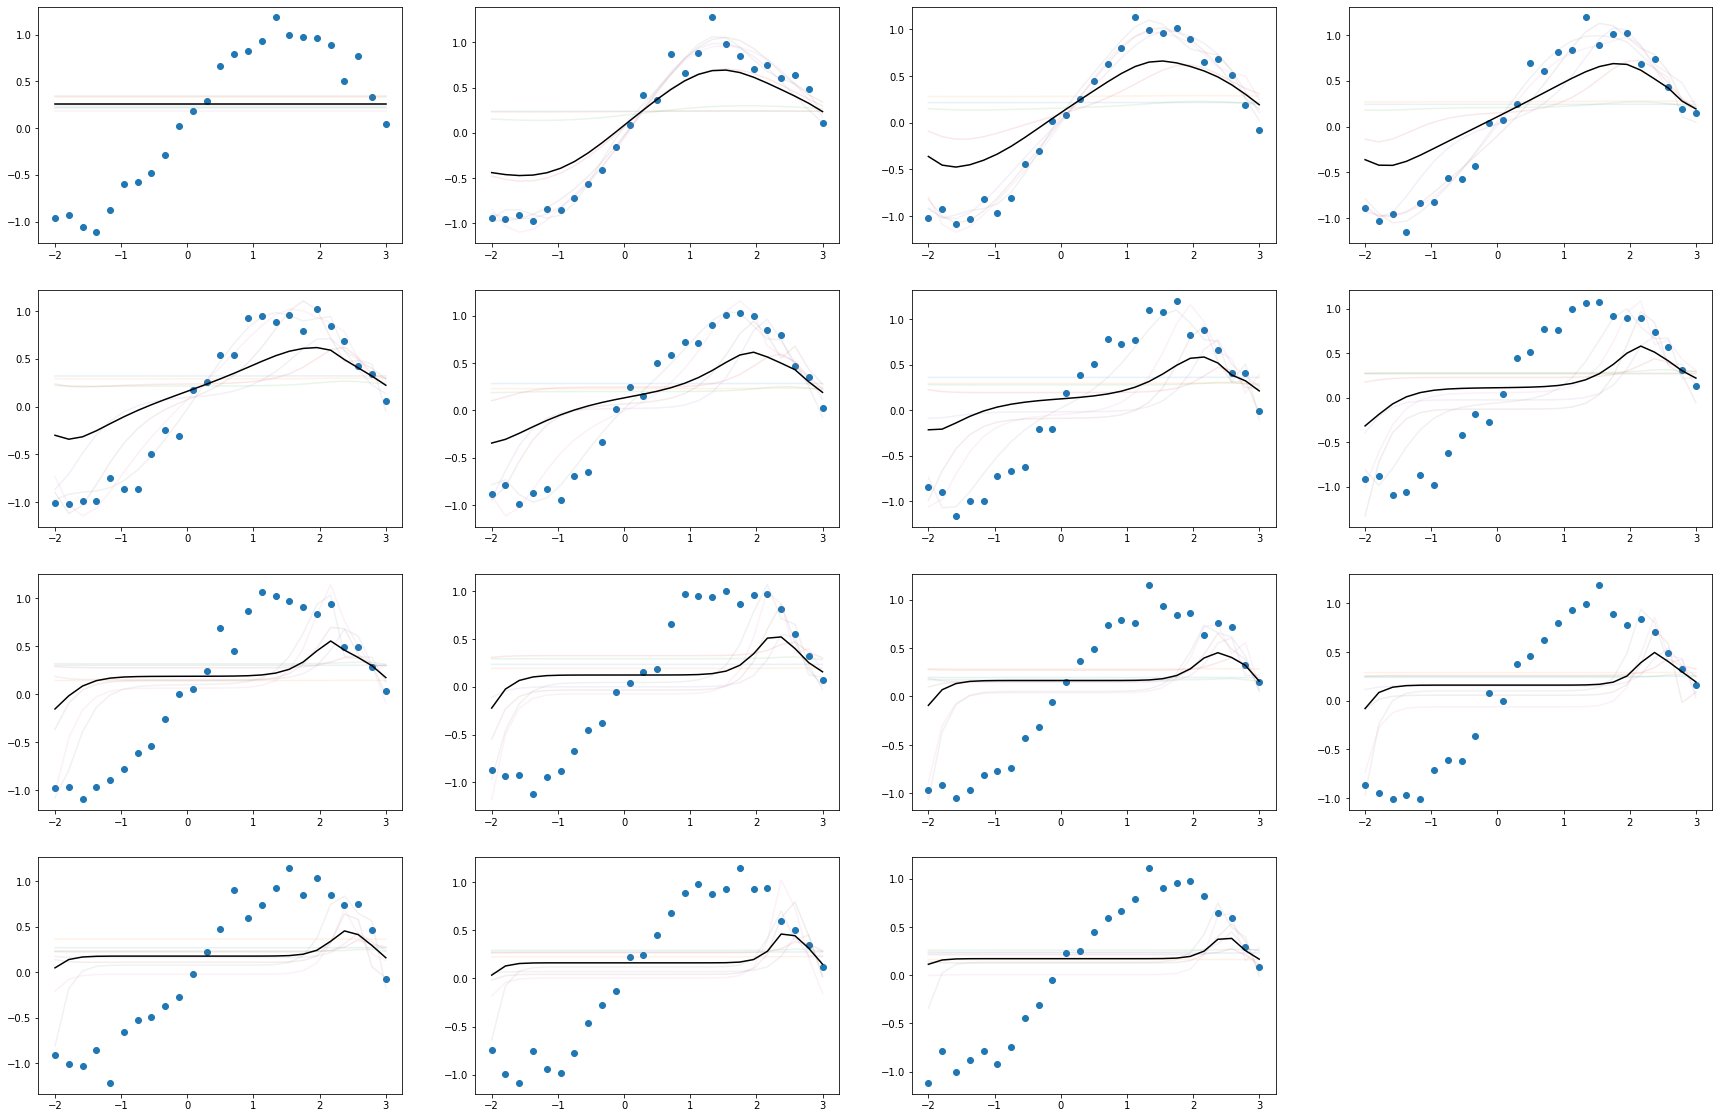

In [231]:
x_min = -2
x_max = 3
N_samples = 25
#Arrenge noise level
noise_level = 0.1


all_bias = []
all_variance = []
all_bias_variance = []
C_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]

plt.figure(figsize=(30,20))
for degree in range(15):
    plt.subplot(4,4,degree+1)

    #Plotting the sample batch:
    poly = PolynomialFeatures(degree)
    prediction_on_data_sample = []
    
    for c in C_values:
        current_data = sample_data_batch(x_min,x_max, N_samples, noise_level)
        x = current_data[0]
        y = current_data[1]
        x_poly = poly.fit_transform(x.reshape(-1,1))
        #Use SVR
        model = SVR(kernel='rbf', C = c)
        model.fit(x_poly, y)
        prediction_on_data_sample.append(model.predict(x_poly))
        plt.plot(x, model.predict(x_poly), alpha = 0.1)

    
    E_D_y_hat = np.mean(prediction_on_data_sample,0)
    var_D_y_hat = np.var(prediction_on_data_sample,0)
    biass= np.sum((f(current_data[0]) - E_D_y_hat)**2)
    variancee = np.sum(var_D_y_hat)

    X = np.linspace(x_min,x_max,N_samples)
    fx = f(X)
    
    expected_pred = np.mean(prediction_on_data_sample,0)
    plt.scatter(X,y)
    plt.plot(X, expected_pred, color='black')

    bias = np.sum((fx - expected_pred)**2)

    #var_pred = np.mean((expected_pred - prediction_on_data_sample)**2,0)
    var_pred = np.var(prediction_on_data_sample,0)

    variance = np.sum(var_pred)

    all_bias.append(bias)
    all_variance.append(variance)
    all_bias_variance.append(bias + variance)

plt.show()

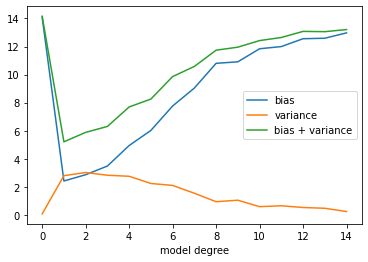

In [232]:
plt.plot(range(15),all_bias, label = 'bias')
plt.plot(range(15),all_variance, label = 'variance')
plt.plot(range(15),all_bias_variance, label = 'bias + variance')
plt.xlabel('model degree')
plt.legend()
plt.show()

According to above bias-variance plot, the best degree for PolynomialFeatures() is 1 because we want the bias + variance trade-off as low as possible.

$\mathbf{Exercise\, 2.}$ Modify the example of Exercise 1 to show the effect of increasing noise values on the bias and on the variance.

Previously the noise level was 0.1 and it is increased as 3.

The C values, x_min, x_max and N_samples are same.

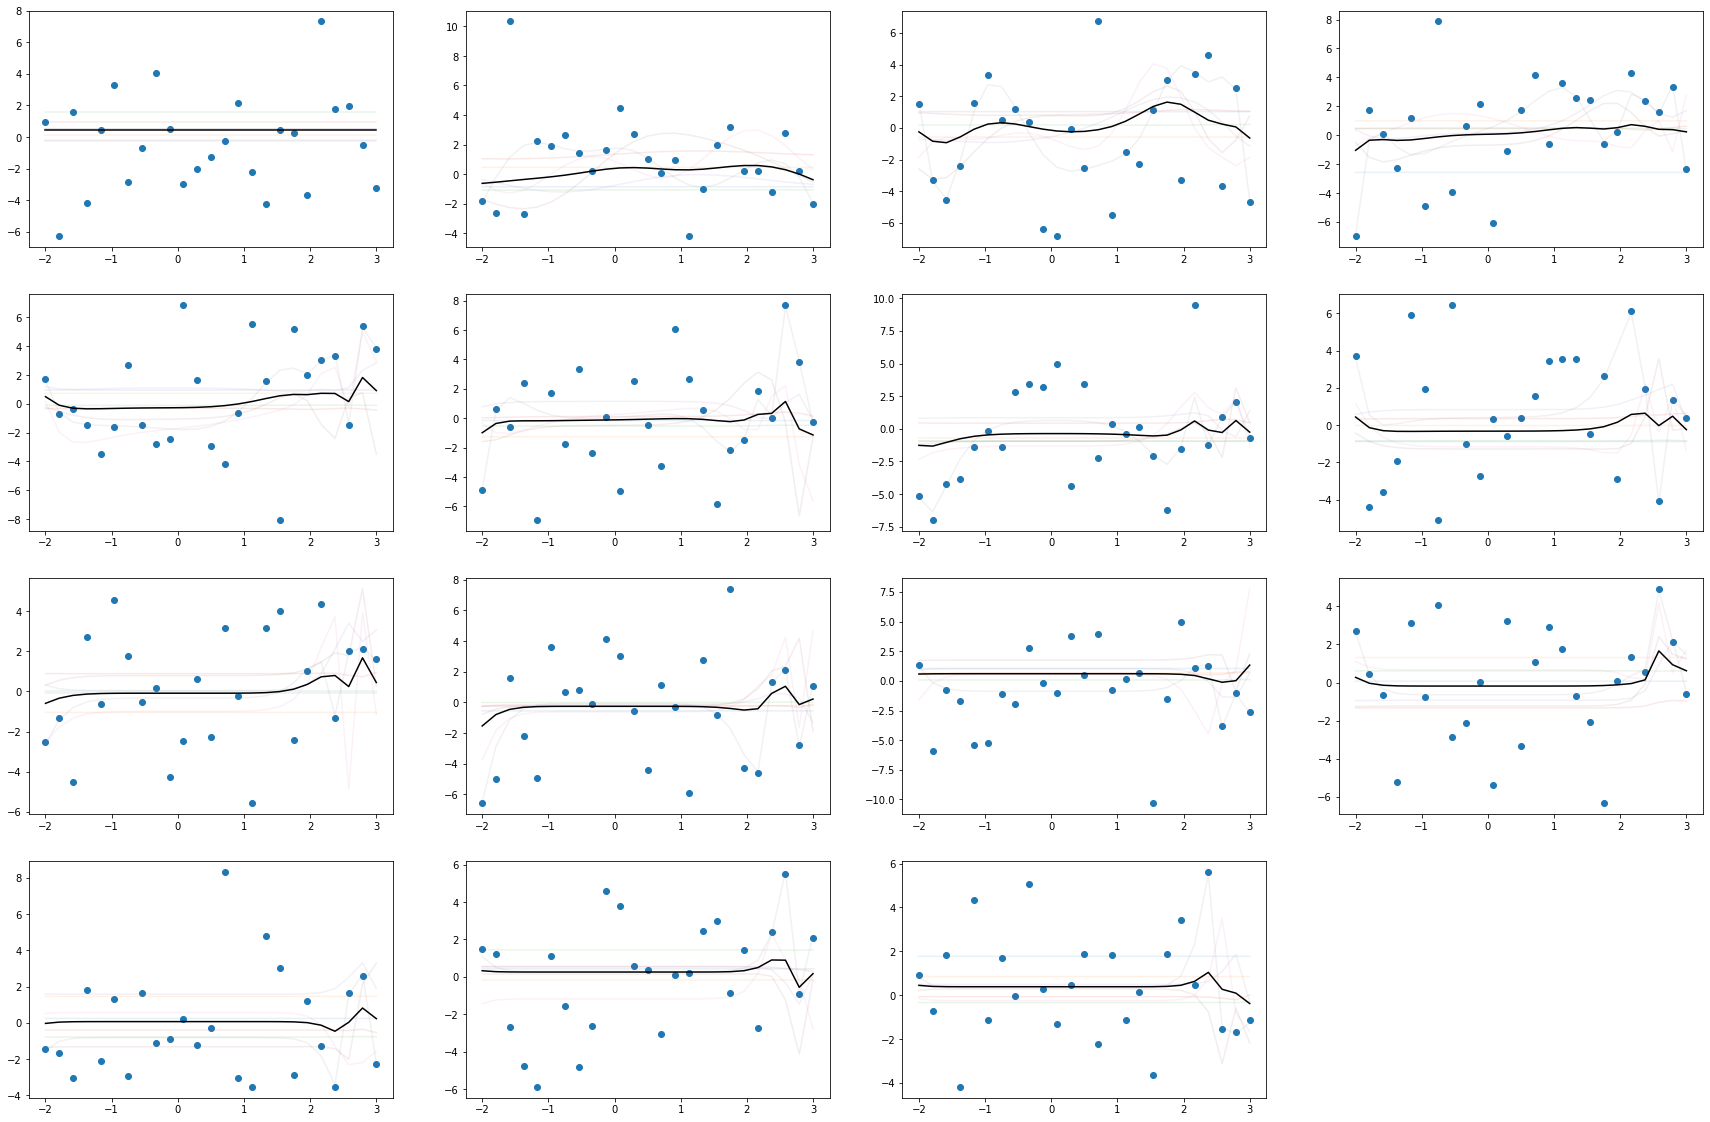

In [233]:
#Set noise level
noise_level = 3


all_bias = []
all_variance = []
all_bias_variance = []

#C values list
C_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]

plt.figure(figsize=(30,20))
for degree in range(15):
    plt.subplot(4,4,degree+1)

    #Plotting the sample batch:
    poly = PolynomialFeatures(degree)
    prediction_on_data_sample = []
    
    for c in C_values:
        current_data = sample_data_batch(x_min,x_max, N_samples, noise_level)
        x = current_data[0]
        y = current_data[1]
        x_poly = poly.fit_transform(x.reshape(-1,1))
        #Use SVR with different c values
        model = SVR(kernel='rbf', C = c)
        model.fit(x_poly, y)
        prediction_on_data_sample.append(model.predict(x_poly))
        plt.plot(x, model.predict(x_poly), alpha = 0.1)

    
    E_D_y_hat = np.mean(prediction_on_data_sample,0)
    var_D_y_hat = np.var(prediction_on_data_sample,0)
    biass= np.sum((f(current_data[0]) - E_D_y_hat)**2)
    variancee = np.sum(var_D_y_hat)

    X = np.linspace(x_min,x_max,N_samples)
    fx = f(X)
    
    expected_pred = np.mean(prediction_on_data_sample,0)
    plt.scatter(X,y)
    plt.plot(X, expected_pred, color='black')

    bias = np.sum((fx - expected_pred)**2)

    #var_pred = np.mean((expected_pred - prediction_on_data_sample)**2,0)
    var_pred = np.var(prediction_on_data_sample,0)

    variance = np.sum(var_pred)

    all_bias.append(bias)
    all_variance.append(variance)
    all_bias_variance.append(bias + variance)


plt.show()

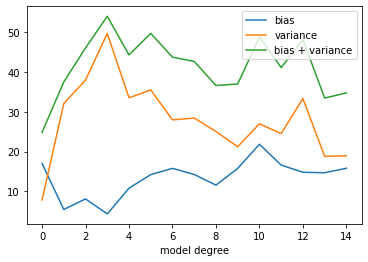

In [234]:
plt.plot(range(15),all_bias, label = 'bias')
plt.plot(range(15),all_variance, label = 'variance')
plt.plot(range(15),all_bias_variance, label = 'bias + variance')
plt.xlabel('model degree')
plt.legend()
plt.show()

When noise level is 3, the bias+variance values has changed. The best degree for bias+variance became 13 for PolynomialFeatures().

$\mathbf{Exercise\, 3.}$ Still from the example of Exercise 1, compute the difference between training error and testing error for different vaues of the regularization parameter _C_. 

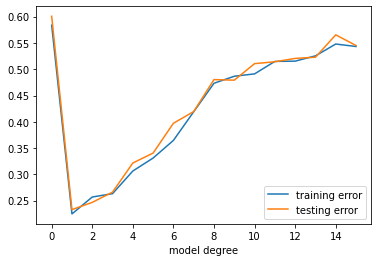

In [235]:
#C values list
C_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]

noise_level = 0.1

train_error = []
test_error = []

## Training and testing error for increasing polynomial degree
for degree in range(16):

    ## We define our polynomial model of given degree
    poly = PolynomialFeatures(degree)
    prediction_on_data_sample = []
    
    train_error_d = []
    test_error_d = []
    
    ## We compute the testing error for several (200) testing data
    for c in C_values:
        ## Generating a sample training dataset
        current_data = sample_data_batch(x_min,x_max, N_samples, noise_level)
        ## Model training
        x_poly = poly.fit_transform(current_data[0].reshape(-1,1))
        reg_poly = SVR(kernel='rbf', C = c)
        reg_poly.fit(x_poly, current_data[1])
        
        ## Generating a testing dataset
        testing_data = sample_data_batch(x_min,x_max, N_samples, noise_level)
        x_test_poly = poly.fit_transform(testing_data[0].reshape(-1,1))
        
        ## Computing the predictions on both training and testing data
        prediction_on_data_test = (reg_poly.predict(x_test_poly))
        prediction_on_data_train = (reg_poly.predict(x_poly))
        
        ## Storing the prediction errors for both training and testing data        
        train_error_d.append(np.mean((current_data[1] - prediction_on_data_train)**2))
        test_error_d.append(np.mean((testing_data[1] - prediction_on_data_test)**2))

    train_error.append(np.mean(train_error_d))
    test_error.append(np.mean(test_error_d))
    
plt.plot(range(16),train_error, label = 'training error')
plt.plot(range(16),test_error, label = 'testing error')
plt.xlabel('model degree')
plt.legend()
plt.show()

According to train-test error values, the sufficent degree for the model is 1 that is correct if we compare with Exercise-1.

## Assignment 2.2

We go back to the usual iris dataset

In [236]:
import numpy as np
import matplotlib.pyplot as plt

# importing the data from sklearn
from sklearn.datasets import load_iris

# importing the data from sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# extracting the relevant information
data = iris_dataset.data
data_feature_names = iris_dataset.feature_names
target = iris_dataset.target
target_names = iris_dataset.target_names

$\mathbf{Exercise\, 1.}$ Using bootstrap, compute a 95% confidence interval for the median of the feature $\mbox{sepal length (cm)}$

In [237]:
sepal_length = [data[i][0] for i in range(len(data))]

# 100 bootstrap repetitions 
B = 10

# We generate our bootstrap data by sampling **with replacement** from our data
bootstrap_sample = np.random.choice(sepal_length, size = [len(sepal_length),B] , replace = True)
print('The size of our bootstrap sample is' + str(bootstrap_sample.shape))

The size of our bootstrap sample is(150, 10)


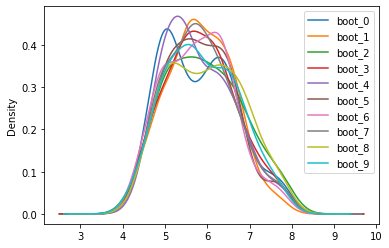

In [238]:
import pandas as pd

df = pd.DataFrame(bootstrap_sample, columns = ['boot_' + str(i) for i in range(B)])
df.plot(kind="kde") 
plt.show()

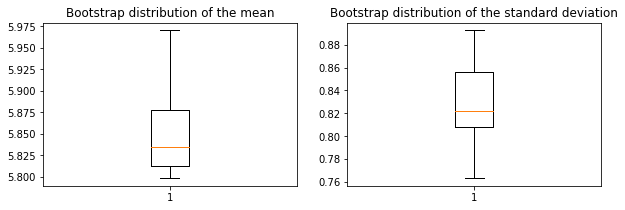

In [239]:
# Computing the bootstrap distribution for the mean and the variance
boot_mean = np.mean(bootstrap_sample,0)
boot_std = np.std(bootstrap_sample,0)

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.boxplot([boot_mean])
plt.title('Bootstrap distribution of the mean')
plt.subplot(1,2,2)
plt.boxplot([boot_std])
plt.title('Bootstrap distribution of the standard deviation')
plt.show()

In [240]:
# We compute a 95% confidence interval for the bootstrap mean
alpha = .05
m = alpha/2 * B

# Identifying our lower and upper quantiles
low = np.sort(boot_mean)[int(m)]
up = np.sort(boot_mean)[int(B-m)]

print('The ' + str(100-alpha *100) + '% confidence interval for the mean is [' 
      + str(low) + ' , ' + str(up) + ']')

The 95.0% confidence interval for the mean is [5.797999999999999 , 5.97066666666667]


$\mathbf{Exercise\, 2.}$ Compute the null distribution for the hypothesis $H_0$: the mean of $\mbox{'sepal width (cm)'}$ is the same for $\mbox{setosa}$ and $\mbox{virginica}$. 

Let's remember the data and target:

In [241]:
data.shape, data_feature_names,  target.shape, target_names

((150, 4),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 (150,),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [242]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Divide the data for each flower:

In [243]:
Setosa = data[:50]
Versicolor = data[50:100]
Virginica = data[100:]

Check the lengths and be sure they are separated correctly:

In [244]:
len(Setosa), len(Versicolor), len(Virginica)

(50, 50, 50)

Take the Setosa-sepal width and Virginica-sepal width:

In [245]:
Setosa_sepal_width = [Setosa[i][1] for i in range(len(Setosa))]
Virginica_sepal_width = [Virginica[i][1] for i in range(len(Virginica))]

Plot them:

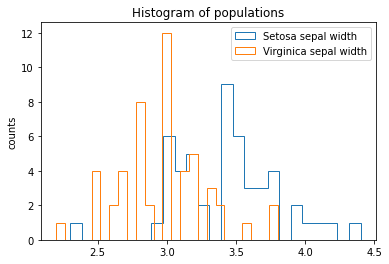

In [246]:
plt.hist(Setosa_sepal_width, 25, histtype='step', label = 'Setosa sepal width')
plt.hist(Virginica_sepal_width, 25, histtype='step', label = 'Virginica sepal width')

plt.title('Histogram of populations')
plt.ylabel('counts')
plt.legend()
plt.show()

In [247]:
x = Setosa_sepal_width
y = Virginica_sepal_width

n = len(x)
m = len(y)

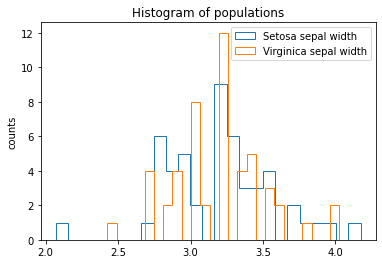

The mean of x_tilde(Setosa) is: 3.201
The mean of y_tilde(Virginica) is: 3.2009999999999996

The variance of x_tilde(Setosa) is: 0.140816
The variance of y_tilde(Virginica) is: 0.10192399999999999

------------------------ 

The mean of x(Setosa) is: 3.428
The mean of y(Virginica) is: 2.974

The variance of x(Setosa) is: 0.14081600000000002
The variance of y(Virginica) is: 0.10192399999999999


In [248]:

def compute_t(x,y):
    n = len(x)
    m = len(y)
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    sigma2_x = np.var(x)
    sigma2_y = np.var(y)

    return( (mean_x - mean_y)/np.sqrt(sigma2_x/n + sigma2_y/m))

# Hypothesis testing
# E(X) = E(Y)

# Observed statistic
t_obs = compute_t(x,y)

# concatenated data for centering the distributions
z = np.concatenate([x, y])

mean_x = np.mean(x)
mean_y = np.mean(y)


# Translating the data around avg(z)
x_tilde = x - mean_x + np.mean(z)
y_tilde = y - mean_y + np.mean(z)


plt.hist(x_tilde, 25, histtype='step', label = 'Setosa sepal width')
plt.hist(y_tilde, 25, histtype='step', label = 'Virginica sepal width')
plt.title('Histogram of populations')
plt.ylabel('counts')
plt.legend()
plt.show()


print('The mean of x_tilde(Setosa) is: ' + str(np.mean(x_tilde)))
print('The mean of y_tilde(Virginica) is: ' + str(np.mean(y_tilde)))

print('\nThe variance of x_tilde(Setosa) is: ' + str(np.var(x_tilde)))
print('The variance of y_tilde(Virginica) is: ' + str(np.var(y_tilde)))

print("\n------------------------ \n")

print('The mean of x(Setosa) is: ' + str(np.mean(x)))
print('The mean of y(Virginica) is: ' + str(np.mean(y)))

print('\nThe variance of x(Setosa) is: ' + str(np.var(x)))
print('The variance of y(Virginica) is: ' + str(np.var(y)))

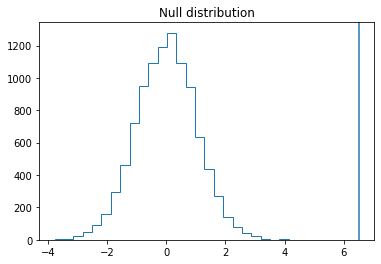

The bootstrap significance of the test is: 0.0


In [249]:
# We now concatenate the centered data and sample from it
z_tilde = np.concatenate([x_tilde, y_tilde])

# Number of bootstrap samples
B = 10000

# We generate B samples 
b_sample = np.random.choice(z_tilde, (B, n+m), replace=True)

# For each pair of bootstrap samples we compute the associated statistic 
t_bootstrap = []
for i in range(B):
    t_bootstrap.append(compute_t(b_sample[i,:n], b_sample[i,n:]))

# Plotting the null hypothesis distribution
plt.hist(t_bootstrap, 25, histtype='step')
plt.title('Null distribution')
plt.axvline(x = t_obs)
plt.show()

# Computing the significance of our test
bootstrap_stat = np.sum(np.abs(t_obs)>np.abs(t_bootstrap))/B

print('The bootstrap significance of the test is: ' + str(1-bootstrap_stat))

We reject the null hypothesis $H_0$ since the bootstrap significance of the test is 0.

$\mathbf{Exercise\, 3.}$ Compute a 2-sided bootstrapped p-value for the difference between the means of $\mbox{setosa}$ and $\mbox{virginica}$.

A p-value is used in hypothesis testing to help you support or reject the null hypothesis. The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

In [250]:
mean_difference_real = np.mean(Setosa) - np.mean(Virginica)
mean_difference_real

-1.7495000000000003

In [251]:
import random

B = 10000
#We'll store the simulated mean differences here:
mean_differences_boostrap = []

#combine the data
z = np.concatenate([Setosa_sepal_width , Virginica_sepal_width])
for i in range(B):
  #Generate 50 random numbers between 0 and 100
  randomlist = random.sample(range(0, 100), 50)
  fake_setosa = [z[i] for i in randomlist]
  fake_virginica = [z[-i] for i in randomlist]
  mean_differences_boostrap.append(np.mean(fake_setosa) - np.mean(fake_virginica))



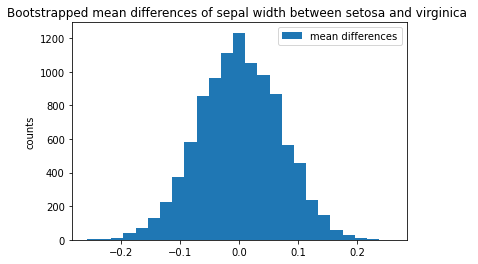

In [255]:
plt.hist(mean_differences_boostrap, 25, histtype='bar', label = 'mean differences')
plt.title('Bootstrapped mean differences of sepal width between setosa and virginica ')
plt.ylabel('counts')
plt.legend()
plt.show()

In [258]:
#Now calculate the p-value. 
numerator = np.sum(mean_difference_real > mean_differences_boostrap) + 1
denom = B+1
lowtail = numerator/denom
lowtail

9.999000099990002e-05

In [265]:
upper = 1-lowtail
upper

0.9999000099990001

Lowtail P-value is very low so we reject the null hypothesis.

$\mathbf{Exercise\, 4.}$ The central limit theorem (Lindeberg-Levy version) states that given a sequence $X_1, X_2, \ldots, X_n $ of independent variables drawn from the same ditribution, $X_i\sim F$, then:

$$ \sqrt{n} \left( \frac{1}{n} \sum X_i - \mu \right) \rightarrow \mathcal{N}(0,\sigma^2),$$

where $\mu = \mathbf{E}[F]$ and $\sigma^2 = Var(F)$.
In particular, the sample mean converges to the normal distribution:

$$ \frac{1}{n} \sum X_i \rightarrow \mathcal{N}(\mu,\frac{\sigma^2}{n}). $$

Let $F = Exponential(2)$ be the exponential distribution with parameter $\lambda = 2$, and let $X_1, X_2, \ldots, X_{20}$ be 20 samples from this distribution. Verify for this case the central limit theorem via bootstrapping. 

__**__ Remember, the mean of the exponential distribution is $\mathbf{E}(F) = 1/\lambda$, while the variance is $Var(F) = 1/\lambda^2$ __**__

Hint:

- Draw n samples (n large) from the Exponential distribution (be careful, when using $\mbox{np.random.exponential}$ the required input scale parameter is $\frac{1}{\lambda}$).
- Compute their average $\frac{\sum X_i}{20}$ and store the result

In [260]:
#Answer:

Let's make 100 bootstrap iterations and calculate the central limit theorem and sample mean. We will define and save the results of 
$$ \sqrt{n} \left( \frac{1}{n} \sum X_i - \mu \right) \rightarrow \mathcal{N}(0,\sigma^2),$$

in a list called "centrals", and, we will save the means i.e.

$$ \frac{1}{n} \sum X_i \rightarrow \mathcal{N}(\mu,\frac{\sigma^2}{n}). $$

in a list called "means".

In [261]:
#Number of bootstarps
B= 1000

sample_means=[]
centrals=[]
for i in range(B):
  samples = np.random.exponential(scale= 1/2, size=20)
  sample_mean = np.sum(samples) / 20
  sample_means.append(sample_mean)

  central_limit_theorem = (sample_mean - (0.5)) * np.sqrt(20)
  centrals.append(central_limit_theorem)

#See the length of the lists
len(sample_means), len(centrals)

(1000, 1000)

In our case, F is the exponential distribution. We will prove:

$$ \sqrt{n} \left( \frac{1}{n} \sum X_i - \mu \right) \rightarrow \mathcal{N}(0,\sigma^2),$$

where Normal distribution has 
- mean=0
- variance= sigma square (1/lambda^2)

If we will find the same(or similar) mean and variance in our bootstrap experiments, then we will prove the theorem.

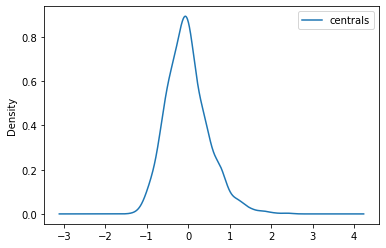

Variance of 'centrals' is =  0.2564201699823622
1 / (lambda)^2 is  0.25
----------
Mean of 'means' list is =  -0.015079972680568378
The mean of Normal distribution of central limit theorem is 0


In [262]:
#CENTRAL LIMIT
df = pd.DataFrame(centrals, columns = ['centrals'])
df.plot(kind="kde") 
plt.show()

print("Variance of 'centrals' is = ",np.var(centrals))
print("1 / (lambda)^2 is ", 1 / (2*2))
print("----------")
print("Mean of 'means' list is = ",np.mean(centrals))
print("The mean of Normal distribution of central limit theorem is 0")

The sample mean converges to the normal distribution:

$$ \frac{1}{n} \sum X_i \rightarrow \mathcal{N}(\mu,\frac{\sigma^2}{n}). $$



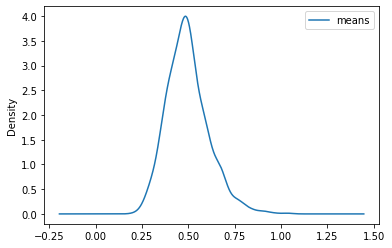

Variance of 'means' list is  =  0.012821008499118111
 sigma^2 / n =  0.0125
----------
Mean of 'means' list is =  0.4966280155987409
mu = E(F) = 1/lambda =  0.5


In [263]:
#SAMPLE MEAN
df = pd.DataFrame(sample_means, columns = ['means'])
df.plot(kind="kde") 
plt.show()

print("Variance of 'means' list is  = ",np.var(sample_means))
print(" sigma^2 / n = ", (1/(2*2))/20)
print("----------")
print("Mean of 'means' list is = ",np.mean(sample_means))
print("mu = E(F) = 1/lambda = ", 1/2.0)

Both in "sample mean" and "central limit theorem" we found similar mean and variance values.